In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data.csv', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
df2 = pd.read_csv('Movie_Id_Titles.csv')
df2.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
main_df = pd.merge(df,df2,on='item_id')
main_df.head()


,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
rating_mean = main_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()
rating_mean 

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [7]:
rating_count = main_df.groupby('title')['rating'].count().sort_values(ascending=False).head()
rating_count

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [8]:
rating = pd.DataFrame(main_df.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [9]:
rating['count'] = main_df.groupby('title')['rating'].count()
rating.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [30]:
df3 = pd.merge(main_df,rating,on='title')
df3.head()

,user_id,item_id,rating_x,timestamp,title,rating_y,count
0,0,50,5,881250949,Star Wars (1977),4.359589,584
1,290,50,5,880473582,Star Wars (1977),4.359589,584
2,79,50,4,891271545,Star Wars (1977),4.359589,584
3,2,50,5,888552084,Star Wars (1977),4.359589,584
4,8,50,5,879362124,Star Wars (1977),4.359589,584


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import seaborn as sns
sns.set_style('white')

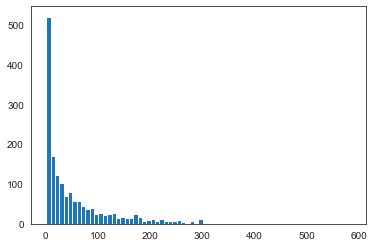

<Figure size 720x288 with 0 Axes>

In [12]:
plt.hist(rating['count'],bins=70)
plt.figure(figsize=(10,4))
plt.show()

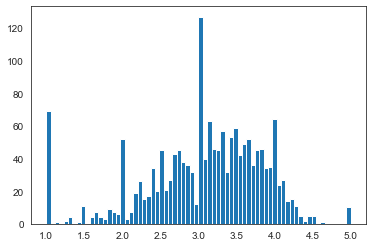

In [13]:
plt.hist(rating['rating'],bins=70)
plt.show()

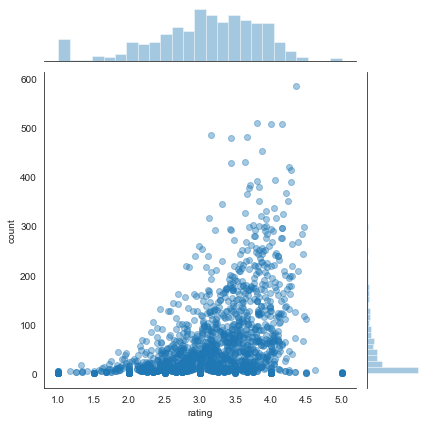

In [14]:
sns.jointplot(x='rating',y='count',data=rating,alpha=0.4)

In [15]:
movie_matrix = main_df.pivot_table(index='user_id',columns='title',values='rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
rating_of_ReturnoftheJedi = movie_matrix['Return of the Jedi (1983)']
rating_of_ReturnoftheJedi

user_id
0      NaN
1      5.0
2      NaN
3      4.0
4      NaN
      ... 
939    NaN
940    3.0
941    5.0
942    NaN
943    4.0
Name: Return of the Jedi (1983), Length: 944, dtype: float64

In [17]:
similar_to_ReturnoftheJedi = movie_matrix.corrwith(rating_of_ReturnoftheJedi)

c:\python38\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python38\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [18]:
corr_ReturnoftheJedi = pd.DataFrame(similar_to_ReturnoftheJedi,columns=['Corelation'])

In [19]:
corr_ReturnoftheJedi.dropna(inplace=True)
corr_ReturnoftheJedi.head()

,Corelation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-0.828079
101 Dalmatians (1996),0.165659
12 Angry Men (1957),-0.026169
187 (1997),0.064155


In [20]:
corr_ReturnoftheJedi['No-of-votes'] = rating['count']

In [21]:
corr_ReturnoftheJedi.head()

,Corelation,No-of-votes
title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-0.828079,5
101 Dalmatians (1996),0.165659,109
12 Angry Men (1957),-0.026169,125
187 (1997),0.064155,41


In [22]:
corr_ReturnoftheJedi[corr_ReturnoftheJedi['No-of-votes'] > 150].sort_values('Corelation',ascending=False).head()

,Corelation,No-of-votes
title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368
Star Wars (1977),0.672556,584
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
